In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

In [2]:
DIRECTORY = r"D:\PetImages"
CATEGORIES=["cat","dog"]

In [26]:

       
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    for img in os.listdir(folder):
    
        img_path = os.path.join(folder, img)
        print(img_path)
        break
        

D:\PetImages\cat\0.jpg
D:\PetImages\dog\0.jpg


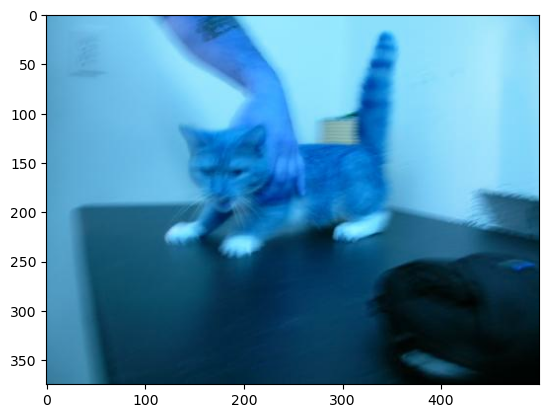

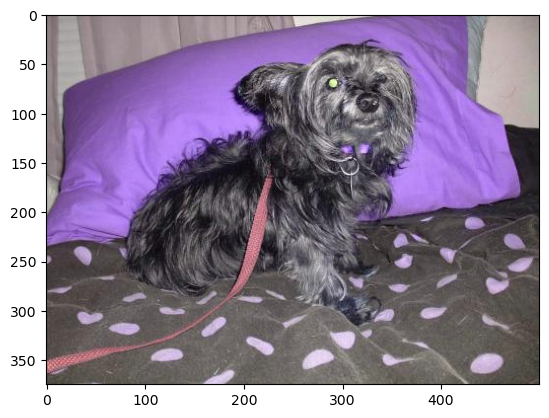

In [27]:
import cv2
import os
import matplotlib.pyplot as plt  # Importing the matplotlib library

IMG_SIZE = 10
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        plt.imshow(img_arr)  # Now plt is defined and you can use it to display images
        plt.show()  # Displaying the image
        break


In [30]:
IMG_SIZE = 10
data = []

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    label = CATEGORIES.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
        #img_arr = cv2.resize(img_arr,(IMG_SIZE, IMG_SIZE))
        data.append([img_arr, label])


In [32]:
len(data)


24961

In [33]:
random.shuffle(data)

In [36]:
data[0]

[array([[[ 94,  82,  72],
         [ 95,  83,  73],
         [ 95,  83,  73],
         ...,
         [ 71,  62,  58],
         [ 71,  62,  58],
         [ 71,  62,  58]],
 
        [[ 94,  82,  72],
         [ 94,  82,  72],
         [ 94,  82,  72],
         ...,
         [ 71,  62,  58],
         [ 71,  62,  58],
         [ 71,  62,  58]],
 
        [[ 93,  81,  71],
         [ 93,  81,  71],
         [ 94,  82,  72],
         ...,
         [ 71,  62,  58],
         [ 71,  62,  58],
         [ 71,  62,  58]],
 
        ...,
 
        [[ 35,  41,  52],
         [ 35,  41,  52],
         [ 37,  43,  54],
         ...,
         [160, 107, 120],
         [162, 108, 121],
         [161, 107, 120]],
 
        [[ 35,  41,  52],
         [ 36,  42,  53],
         [ 37,  43,  54],
         ...,
         [162, 108, 121],
         [162, 109, 122],
         [160, 107, 120]],
 
        [[ 36,  42,  53],
         [ 36,  42,  53],
         [ 37,  43,  54],
         ...,
         [163, 109, 122],
  

In [34]:
x=[]
y=[]
for features, labels in data:
    x.append(features)
    y.append(labels)

In [40]:
import numpy as np

# Convert each element in x to a NumPy array
x_arrays = [np.array(element) for element in x]

# Check if all x_arrays have the same shape
x_shapes = [arr.shape for arr in x_arrays]
if len(set(x_shapes)) > 1:
    print("x contains arrays with different shapes")
else:
    # All x_arrays have the same shape, so we can convert x to a NumPy array
    x = np.array(x_arrays)

# Convert y to a NumPy array
y = np.array(y)


x contains arrays with different shapes


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize lists to store data
X_data = []
y_data = []

# Iterate over the data
for img_arr, label in data:
    if img_arr is None:
        print("Skipping image with NoneType array")
        continue
    if img_arr.size == 0:
        print("image ")
        continue
    # Resize image and flatten it
    resized_img = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    flattened_img = resized_img.flatten()
    # Append resized and flattened image to X_data
    X_data.append(flattened_img)
    # Append label to y_data
    y_data.append(label)

# Convert lists to NumPy arrays
X = np.array(X_data)
y = np.array(y_data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # You can try different kernels
svm_model.fit(X_train, y_train)

# Predict labels for test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have already prepared your data in X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')  # You can try different kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
